# Explicit Song Lyrics Through the Decades
##### Prisha Bhatia and Kenta Terasaki


### Question
As with many other things in life, the music industry is constantly evolving. Current trends, the artists who are popular, and the interests of audience all have an influence on what is popular and what is talked about in music. A big trend we seem to see now is every song seems to be extremely explicit. Parents moderate this as they choose, some by letting their kids decide what they listen to, some by completely controlling their child's music, and some by only banning certain songs. We have heard many people from older generations mention that their generation was better and didn't have the "crude and disrespectful" values that we have. To put this to the test, we decided to see how music has evolved through the decades. 

We ask: how has the use of explicit lyrics in music changed throughout the decades?


### Methods
The data we chose was the Wikipedia page listing the top 100 billboard music songs for every year. In order to scrap this data, we installed the beautifulsoup4 package. We also needed to import requests and pandas to be able to work with our data.

To ensure the latest version of the code shows up, run the cell below.

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In order to be able to access the function to scrape the data, we import it below.

In [7]:
from get_data import get_table
from bad_word_counter import word_counter_total
import csv
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

The get_table function takes in a year and returns the Wikipedia table associated with that year in list format. Specifically, it is a list of lists. The inner list contains the song and the artist ['Song', 'Artist']. The order that the songs are in is the order that they are ranked (i.e. the element in the list at index 0 is the number one song, and the element in the list at index 99 is the song in the 100th place). In the example below, we input the year 1990 and get a list of 100 songs and their corresponding artists.

In [8]:
nineties_list = get_table(1990)
print(nineties_list)

[['Wilson-Phillips', 'Hold-On'], ['Roxette', 'It-Must-Have-Been-Love'], ["Sinéad-O'Connor", 'Nothing-Compares-2-U'], ['Bell-Biv-DeVoe', 'Poison'], ['Madonna', 'Vogue'], ['Mariah-Carey', 'Vision-of-Love'], ['Phil-Collins', 'Another-Day-in-Paradise'], ['En-Vogue', 'Hold-On'], ['Billy-Idol', 'Cradle-of-Love'], ['Jon-Bon-Jovi', 'Blaze-of-Glory'], ['Bell-Biv-DeVoe', 'Do-Me'], ['Michael-Bolton', 'How-Am-I-Supposed-to-Live-Without-You'], ['Technotronic', 'Pump-Up-the-Jam'], ['Paula-Abdul', 'Opposites-Attract'], ['Janet-Jackson', 'Escapade'], ['Heart', 'All-I-Wanna-Do-Is-Make-Love-to-You'], ['Maxi-Priest', 'Close-to-You'], ['Alannah-Myles', 'Black-Velvet'], ['Wilson-Phillips', 'Release-Me'], ['Linda-Ronstadt', "Don't-Know-Much"], ['Lisa-Stansfield', 'All-Around-the-World'], ['Calloway', 'I-Wanna-Be-Rich'], ['Johnny-Gill', 'Rub-You-the-Right-Way'], ['Glenn-Medeiros', "She-Ain't-Worth-It"], ['Sweet-Sensation', 'If-Wishes-Came-True'], ['Snap', 'The-Power'], ['Nelson', "Can't-Live-Without-Your-Lov

In [9]:
all_bad_words = []

start_year = 1990
end_year = 2022
all_bad_words.append(word_counter_total(start_year, end_year))

In [10]:
print(all_bad_words)

[[{'sex': 1, 'hell': 4, 'year': 1990}, {'sex': 8, 'hell': 1, 'year': 1991}, {'shit': 1, 'ass': 1, 'bitch': 1, 'dick': 1, 'sex': 4, 'pussy': 1, 'hell': 4, 'cock': 2, 'year': 1992}, {'fuck': 7, 'shit': 8, 'ass': 8, 'bitch': 1, 'dick': 1, 'motherfucker': 1, 'year': 1993}, {'fuck': 11, 'shit': 10, 'ass': 18, 'bitch': 13, 'crap': 1, 'hell': 8, 'motherfucker': 3, 'year': 1994}, {'fuck': 4, 'shit': 6, 'ass': 1, 'bitch': 3, 'dick': 32, 'sex': 3, 'hell': 4, 'year': 1995}, {'fuck': 42, 'shit': 6, 'ass': 2, 'bitch': 6, 'dick': 3, 'sex': 7, 'pussy': 2, 'hell': 10, 'cock': 1, 'motherfucker': 2, 'year': 1996}, {'fuck': 7, 'shit': 12, 'ass': 5, 'bitch': 2, 'dick': 1, 'sex': 10, 'crap': 1, 'hell': 6, 'year': 1997}, {'fuck': 19, 'shit': 19, 'ass': 5, 'bitch': 6, 'dick': 5, 'sex': 18, 'hell': 1, 'year': 1998}, {'fuck': 14, 'shit': 4, 'ass': 1, 'bitch': 3, 'dick': 3, 'pussy': 1, 'hell': 4, 'cock': 1, 'motherfucker': 1, 'hoe': 1, 'year': 1999}, {'fuck': 22, 'shit': 10, 'ass': 15, 'bitch': 3, 'dick': 6, 'p

In [11]:
word_bank = ['fuck', 'shit', 'ass', 'bitch', 'cunt', 'dick', 'sex', 'slut', 'pussy', 'crap', 'hell', 'cock', 'penis', 'bussy', 'motherfucker', 'hoe', 'whore','munch']
data = all_bad_words[0]
for sub_dict in data:
    for bad_word in word_bank:
        if bad_word not in sub_dict:
            sub_dict[bad_word] = 0
print (data)

[{'sex': 1, 'hell': 4, 'year': 1990, 'fuck': 0, 'shit': 0, 'ass': 0, 'bitch': 0, 'cunt': 0, 'dick': 0, 'slut': 0, 'pussy': 0, 'crap': 0, 'cock': 0, 'penis': 0, 'bussy': 0, 'motherfucker': 0, 'hoe': 0, 'whore': 0, 'munch': 0}, {'sex': 8, 'hell': 1, 'year': 1991, 'fuck': 0, 'shit': 0, 'ass': 0, 'bitch': 0, 'cunt': 0, 'dick': 0, 'slut': 0, 'pussy': 0, 'crap': 0, 'cock': 0, 'penis': 0, 'bussy': 0, 'motherfucker': 0, 'hoe': 0, 'whore': 0, 'munch': 0}, {'shit': 1, 'ass': 1, 'bitch': 1, 'dick': 1, 'sex': 4, 'pussy': 1, 'hell': 4, 'cock': 2, 'year': 1992, 'fuck': 0, 'cunt': 0, 'slut': 0, 'crap': 0, 'penis': 0, 'bussy': 0, 'motherfucker': 0, 'hoe': 0, 'whore': 0, 'munch': 0}, {'fuck': 7, 'shit': 8, 'ass': 8, 'bitch': 1, 'dick': 1, 'motherfucker': 1, 'year': 1993, 'cunt': 0, 'sex': 0, 'slut': 0, 'pussy': 0, 'crap': 0, 'hell': 0, 'cock': 0, 'penis': 0, 'bussy': 0, 'hoe': 0, 'whore': 0, 'munch': 0}, {'fuck': 11, 'shit': 10, 'ass': 18, 'bitch': 13, 'crap': 1, 'hell': 8, 'motherfucker': 3, 'year': 1

In [12]:
data = all_bad_words[0]



keys = list(data[0].keys())
keys.remove('year')
with open('output.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Year'] + keys)
    for d in data:
        writer.writerow([d['year']] + [d[k] for k in keys])


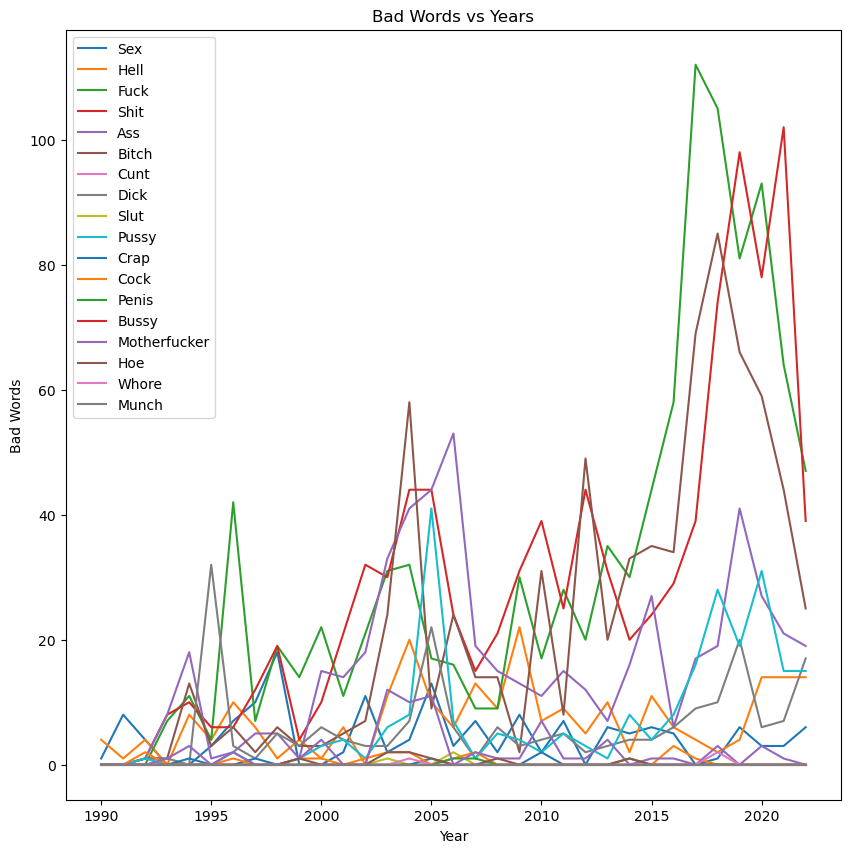

In [22]:
x = []
sex = []
hell = []
fuck = []
shit = []
ass = []
bitch = []
cunt = []
dick = []
slut = []
pussy = []
crap = []
cock = []
penis = []
bussy = []
motherfucker = []
hoe = []
whore = []
munch = []



with open('output1990-2022.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) # skip header row
    for row in reader:
        x.append(int(row[0])) # year
        sex.append(int(row[1])) 
        hell.append(int(row[2])) 
        fuck.append(int(row[3])) 
        shit.append(int(row[4])) 
        ass.append(int(row[5]))
        bitch.append(int(row[6]))
        cunt.append(int(row[7])) 
        dick.append(int(row[8])) 
        slut.append(int(row[9])) 
        pussy.append(int(row[10])) 
        crap.append(int(row[11])) 
        cock.append(int(row[12])) 
        penis.append(int(row[13])) 
        bussy.append(int(row[14])) 
        motherfucker.append(int(row[15])) 
        hoe.append(int(row[16])) 
        whore.append(int(row[17])) 
        munch.append(int(row[18])) 

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(x, sex, label='Sex')
plt.plot(x, hell, label='Hell')
plt.plot(x, fuck, label='Fuck')
plt.plot(x, shit, label='Shit')
plt.plot(x, ass, label='Ass')
plt.plot(x, bitch, label='Bitch')
plt.plot(x, cunt, label='Cunt')
plt.plot(x, dick, label='Dick')
plt.plot(x, slut, label='Slut')
plt.plot(x, pussy, label='Pussy')
plt.plot(x, crap, label='Crap')
plt.plot(x, cock, label='Cock')
plt.plot(x, penis, label='Penis')
plt.plot(x, bussy, label='Bussy')
plt.plot(x, motherfucker, label='Motherfucker')
plt.plot(x, hoe, label='Hoe')
plt.plot(x, whore, label='Whore')
plt.plot(x, munch, label='Munch')
plt.xlabel('Year')
plt.ylabel('Bad Words')
plt.title('Bad Words vs Years')
plt.legend()
plt.show()

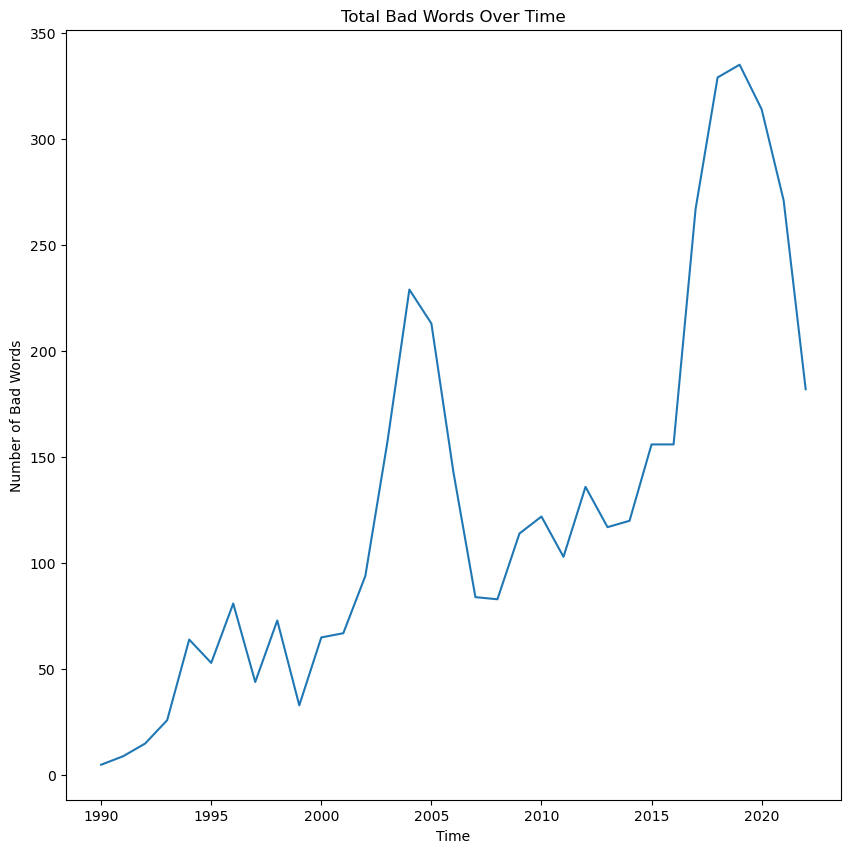

In [26]:
total_per_year = []
with open('output1990-2022.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) # skip header row
    for row in reader:
        word = 0
        for i in range(1,19):
            word += int(row[i])
        total_per_year.append(word)
timestep = np.arange(1990, 2023, 1)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(timestep, total_per_year)
plt.xlabel('Time')
plt.ylabel('Number of Bad Words')
plt.title('Total Bad Words Over Time')
plt.show()

In [24]:

word_total_bank = []

for i in range(1, 19):
    word = 0
    with open('output1990-2022.csv', 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader) # skip header row
        for row in reader:    
            word += int(row[i])
    word_total_bank.append(word)


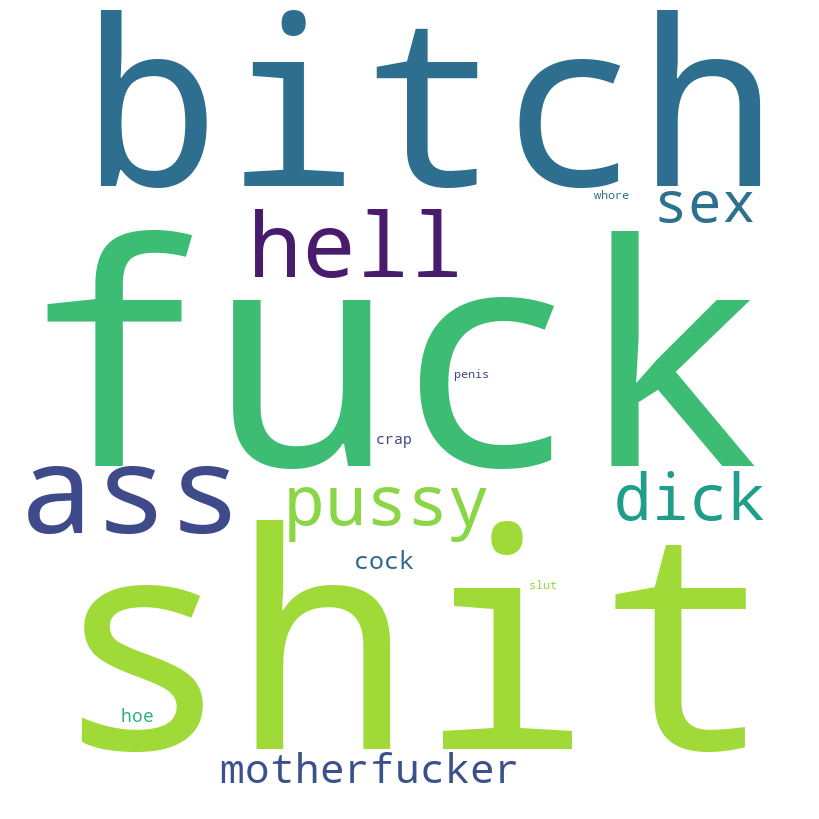

In [25]:

bad_word_bank = ["sex", "hell","fuck","shit","ass", "bitch","cunt","dick","slut","pussy","crap","cock","penis","bussy","motherfucker","hoe","whore","munch"]
word_counter_dict = dict(zip(bad_word_bank,word_total_bank))


# Create a WordCloud object with font size proportional to the values in the dictionary
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10)
wordcloud.generate_from_frequencies(frequencies=word_counter_dict)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [17]:
total_int = 0
for i in range(len(word_total_bank)):
    total_int += word_total_bank[i]
print(total_int)

4260


In [18]:
total_percentages = []
for i in range(len(word_total_bank)):
    total_percentages.append(word_total_bank[i]/total_int)
print(total_percentages)

[0.03591549295774648, 0.0568075117370892, 0.2431924882629108, 0.2300469483568075, 0.12769953051643193, 0.17676056338028168, 0.0, 0.04788732394366197, 0.0007042253521126761, 0.056103286384976525, 0.0011737089201877935, 0.003990610328638498, 0.0007042253521126761, 0.0, 0.01643192488262911, 0.0018779342723004694, 0.0007042253521126761, 0.0]
